# CM2015 Programming with Data

Midterm Assignment - Exploratory Data Analysis\
Creation of Nutritionally Complete Diet with Minimized Carbon Emissions\
Onyx Christopher\
2023-01-09


## 1 Introduction

This exploratory data analysis will use nutrition, climate, and food composition data to explore food patterns. All three of these fields have constant data - that is, aside from occasional advancements in food production, the underlying facts that the data tries to represent do not change. Despite this, the data involved is still very much in development, perhaps because the fields involved are so complex.

This analysis aims to explore an intersection of datasets that contain constant information, yet are evolving as well. For this reason, interchangeability of data will be an important focus. Ideally, a similar analysis could be conducted in future using better data and with minimal change to the code. The main question motivating this analysis is the following: Can data be used to derive a nutritionally complete diet with extremely low climate impact?

### 1.1 Background

#### Nutrition

Foods contain a wide variety of nutrients, many of which are essential for human health.

Many people are aware of the most common nutrients, like carbohydrates, protein, fat, calcium, iron, and some vitamins. However, they may be unaware that several more obscure vitamins and minerals are essential nutrients - that is, humans require them to function properly and cannot produce them ourselves. There is a recommended dietary allowance (RDA) for each essential nutrient, which meets the daily needs of the vast majority of people [1]. Essentially, an excellent diet allows you to meet the RDA for all nutrients every day (or 7x the RDA every week).

Different foods have vastly different nutrient profiles: lentils are high in protein and carbohydrates, while walnuts are high in fat. As such, eating a variety of foods is necessary to meet the RDA.

The tolerable upper intake level (UL) is another metric which defines a daily upper bound for a nutrient. Consuming amounts of that nutrient above the UL every day may result in adverse effects.

#### Carbon

All foods need to be produced in some way. This production results in side effects to the environment, such as greenhouse gas emissions, land use change, water use, and biodiversity loss.

Greenhouse gas (GHG) emissions are one of the main concerns of climate change due to the catastrophic warming effect they have on the planet's atmosphere. Many greenhouse gases exist, and some are worse for the planet than others. In climate data, carbon dioxide equivalents (CO2eq) are used to measure how much various GHGs warm up the atmosphere. Essentially, CO2eq measure how much CO2 would produce the same warming effect in the atmosphere.

To arrive at the consumer, foods also need to be packaged, transported, and sold. The global food system is so large and complex that it accounts for more than a quarter of all greenhouse gas emissions [2]. But again, different foods have vastly different carbon emissions. A kilogram of potatoes requires 0.5 kg CO2eq to be produced, whereas a kilogram of cheese requires 24 kg CO2eq.

A common objection to categorizing foods by climate impact is that local foods are far better than internationally shipped foods in terms of emissions. However, this is not exactly true - the transport emissions of foods generally account for only a small portion of their emissions, while production plays a much larger role [2]. As such, data involving the carbon impact of various foods is reasonably accurate regardless of production location.

#### Significance

Avoiding the catastrophic consequences of unchecked climate change is unquestionably important. Food is an often-overlooked but massive contributor to carbon emissions, deforestation, ocean dead zones... we have to consume food, but how can we minimize our impact?

This is where nutrition and climate data becomes important. We know which foods are best in terms of having a low climate impact, but can said foods even be ordered into a nutritionally complete diet? If they can, we have another step we can take to mitigate climate change.

Climate data on the impact of specific foods appears to be rather new, so it is unlikely an analysis of this type has been performed before. While the scope of this analysis will not be massive, further analyses could use the lessons learned to improve the data processing involved and advance this field of research.

### 1.2 Goal

The goal of this analysis is to provide a base of code that can:

- Process the raw datasets into a workable format (a single table)
- Use the tabular data to generate a nutritionally complete diet with minimal carbon emissions

Additional to the core motivation above, the different aspects of the data processing pipeline will also be considered. A special emphasis will be placed on the code being reusable, due to the high rate of evolution of nutritional, food, and climate data, so that a similar analysis could be performed in future with better data.

### 1.3 Scope

Though the core datasets which this analysis uses are quite large, the data that will be practically in use is comparatively much smaller. Food composition and carbon data is extensive, but an unfortunate lack of standardization of naming conventions means that combining these two datasets requires a certain amount of manual verification. For a project of this magnitude, it is therefore not viable to use the larger datasets in full, since the manual work required would exponentiate.

However, since much of the code will be reusable, the larger datasets could be combined in future, possibly by tanking the manual verification process or acquiring the name-standardized data that does not yet seem to exist.

Additionally, nutrition and climate data have large variances, due to the natural inexactitude of food production. The final data is usually composed of averages. This is true for nutrient RDAs as well, since people have different requirements. As such, any conclusions reached in this analysis are unlikely to hold for all people, but should be reasonably accurate for many.

Finally, climate impact data relating to food often discusses land use, water use, eutrophication, etc. To keep the scope small enough and the task achievable, only carbon emissions data will be used. 

### 1.4 Dataset Acquisition and Ethics

The datasets used come from three places:

- Our World in Data
- canada.ca
- The United States Department of Agriculture's FoodData Central

Our World in Data provides a downloadable CSV listing different foods and their climate effects [2]. It uses data from Poore & Nemecek's 2018 meta-analysis of the environmental effects of the global food system [3], one of the most comprehensive pieces of research relating to food and climate. They also use a 2022 dataset [4] which extended the food/climate data of Poore & Nemecek. The content provided by Our World in Data is licensed under CC BY [5].

The government site of Canada, canada.ca, has several pages of tables listing the average requirements, RDAs, and tolerable upper limits for common nutrients. The terms and conditions state, for all materials on the site [6]:

>Unless otherwise specified you may reproduce the materials in whole or in part for non-commercial purposes, and in any format, without charge or further permission, provided you do the following:
> - exercise due diligence in ensuring the accuracy of the materials reproduced
> - indicate both the complete title of the materials reproduced, as well as the author (where available)
> - indicate that the reproduction is a copy of the version available at \[URL where original document is available\]

The data retrieved from canada.ca is a partial reproduction of the information accessed at source [1]. The different tables from which the data is retrieved fall under the title Dietary Reference Intakes (no author). The details of the data collection performed are discussed in section 1.6.

After examining the options of webscraping and API use for retrieving nutrient requirement data, no clear options presented themselves. Nutritional requirements data is open for public use, but no source examined gave permission to webscrape, had an API, or was downloadable as a machine-readable format. As such, it was decided that the very small dataset was best collected manually. Canada's government site was chosen for their reliability and clear representation of the data. The collected data, titled nutrient-requirements.csv, is present in the ZIP containing this Jupyter Notebook file. It has been double-checked for accuracy.

FoodData Central, provided by the USDA, offers several downloadable zip files [7], notable among which is the SR Legacy database, containing comprehensive composition data for many foods. The food composition data in the downloads is complex and much of it is not required in this analysis. Of the many files downloaded from the SR Legacy database, only 3 were needed:

- food.csv, a table of foods' IDs, types, and names. This was required to map food names to their IDs.
- food_nutrient.csv, a table of food and nutrient IDs mapped onto nutrient amounts. This is the food composition data, but does not contain food or nutrient names.
- nutrient.csv, a table of nutrients IDs, names, and units. This was required to map nutrient names to their IDs.

Since only a small subset of the food.csv and food_nutrient.csv files will be needed, they are not included in the ZIP file containing this Jupyter Notebook. Rather, edited versions that contain the relevant information (named food_used.csv and food_nutrient_used.csv) are present.

The USDA states the following about FoodData Central in their API Guide [8]:

> USDA food composition data are in the public domain and they are not copyrighted. No permission is needed for their use. USDA would appreciate it if developers would list FoodData Central as the source of the data.

### 1.5 Other Data within the Research Space

Both Canada and Australia offer food composition datasets of their own, respectively named the Canadian Nutrient File [9] and the Australian Food Composition Database [10]. Both were considered for use to replace the data from the USDA. However, Canada's dataset is harder to work with, older, and also larger due to the presence of a second official language, French. Australia's dataset is smaller, but only offers downloads under CC BY-SA 3.0 AU (an Australian Creative Commons license) which complicates licensing requirements. Additionally, both list the USDA as a source. Since the USDA is a primary source for much of the nutrition data available, it was chosen over other options.

Nutrient requirements data is often governmental and so highly reliable. There were other options, but Canada was chosen since their presentation is fairly intuitive.

Climate data on the impact of specific foods is still rather new. The Poore & Nemecek data is the only primary source data that appears to be currently available, with all sources of similar content being a derivation.

### 1.6 Nutrient Requirements Data Collection

Nutrient requirements vary by age and gender. Adults' requirements are usually quite similar, but there are notable exceptions, such as iron requirements. Wherever adult nutrient requirements are different, the higher value has been collected. This higher value is always within the tolerable upper limit of this nutrient for all adults. Similarly, whenever adult upper limits are different, the lower value has been collected.

Due to this collection process, the nutrient requirement list may not be as accurate as it could be for a given person. However, if the nutrient requirements dataset was modified to meet the needs of a given person (by adjusting calories, protein, iron, etc. needed) the code would still be reusable.



## 2 Data Processing

The goal is to output a viable diet with minimal carbon emissions. To do this, there are several datasets we need. Data linking food to carbon emissions is required to choose foods with low emissions. Food composition data is required to calculate the nutrients provided by these foods. Lastly, nutritional requirements are needed to ascertain whether the nutrients provided by these foods are adequate.

There are several steps that need to be performed:
1. Order food/emissions data so that low-emission foods come first
2. Extract food composition data for these foods
3. Use an algorithm (explained later) to check different combinations of these foods against nutritional requirements data
4. If a viable diet cannot be created, repeat 2 and 3 with one more food added in.

But first, we need to get our datasets into a workable format. We'll start with the emissions data.

### 2.1 Emissions data processing

The emissions data contains several metrics, such as land use, water use, and eutrophication, that we do not require for this analysis. We will move the CSV to pandas then manipulate the data into a series containing only food name and carbon emissions per kilogram.

In [1]:
# code cell 1
# ORDERING CO2 DATA BY EMISSIONS

import pandas as pd

df_emis = pd.read_csv('food-footprints.csv') # emis stands for emissions

# We need to create a new series with names and emissions per kilogram

names = df_emis['Entity'] # extract name data from the df
kg_emis = df_emis['Emissions per kilogram'] # extract emissions per kilogram data from the df

series_emis = pd.Series(data=kg_emis.array, index=names, name='Emissions per kilogram')

# Sort the series by emissions values

series_emis.sort_values(inplace=True) # note that the unit is kg CO2eq

Now we have the data ordered by emissions. There are a couple questionable low-emissions items in the dataset, like Frozen sweet potato fries and Ale. Multiple-ingredient foods like this have varying compositions, so if they are included in the dataset, the precise composition of the foods intaken will be much more heterogeneous. Put simply, using only single-ingredient foods makes the calculations performed on the data much more reliable in practice. As such, multiple-ingredient foods will be edited out of this dataset.

In [2]:
# code cell 2
# EDITING MULTIPLE INGREDIENT FOODS OUT OF DATASET

series_emis.to_csv('emissions_data_unedited.csv') # save the raw emissions data to a csv

# edit out the multiple ingredient foods

# read the edited data into a dataframe with the names column ('Entity') as index values
emissions = pd.read_csv('emissions_data.csv', index_col='Entity').squeeze()
# the .squeeze() method turns this 1-column dataframe into a series
emissions

Entity
Potatoes             0.207276
Onions               0.362860
Almond butter        0.387011
Apple juice          0.458378
Limes                0.463008
                      ...    
Parmesan cheese     24.016480
Cottage cheese      25.278503
Lamb (leg)          30.740947
Beef mince          95.034572
Beef steak         129.747715
Name: Emissions per kilogram, Length: 94, dtype: float64

### 2.2 Food composition data processing

As seen in the emissions data, plant foods, especially fruits, vegetables, and nuts, are optimal in terms of lowering carbon emissions, while animal foods, particularly beef, are the worst offenders.

With emissions data in a good format, we should move onto food composition data. As mentioned before, to combine emissions and composition data, names must be manually aligned for comparison. There are several ways to do this, and the easiest is to perform the following steps:
1. Find food names desired in food.csv
2. Take the rows of these foods and insert them into a new dataframe, ordered from lowest to highest emissions
3. Save this dataframe as food_used.csv
4. Add each row in food_nutrient.csv that contains a food id present in food_used.csv to a new dataframe
5. Save this dataframe as food_nutrient_used.csv
6. Create the 'master dataframe' which will contain all the usable data
7. Agglomerate all composition data

In [3]:
# code cell 3
# LINKING FOOD IDS TO FOOD NAMES WITH FOOD.CSV

list_of_wanted_food_names = ["Potatoes, raw, skin", "Onions, raw", "Nuts, almond butter, plain, without salt added", "Apple juice, canned or bottled, unsweetened, without added ascorbic acid", "Limes, raw", "Oranges, raw, all commercial varieties", "Lemons, raw, without peel", "Orange juice, raw (Includes foods for USDA's Food Distribution Program)", "Apples, raw, without skin", "Oil, coconut", "Nuts, almonds", "Beverages, almond milk, unsweetened, shelf stable", "Squash, summer, zucchini, includes skin, raw", "Cucumber, peeled, raw", "Bananas, raw", "Cabbage, raw", "Cauliflower, raw", "Broccoli, raw", "Kale, raw", "Peppers, sweet, red, raw", "Avocados, raw, all commercial varieties", "Pears, raw", "Asparagus, raw", "Pineapple, raw, all varieties", "Carrots, raw", "Watermelon, raw", "Corn, sweet, yellow, raw", "Parsnips, raw", "Peas, green, raw", "Spinach, raw", "Tofu, extra firm, prepared with nigari", "Pasta, dry, unenriched", "Melons, cantaloupe, raw", "Quinoa, uncooked", "Couscous, dry", "Seeds, chia seeds, dried", "Seeds, pumpkin and squash seed kernels, dried", "Chickpeas (garbanzo beans, bengal gram), mature seeds, raw", "Beans, black, mature seeds, raw", "Beverages, rice milk, unsweetened", "Kiwifruit, green, raw", "Pasta, dry, unenriched", "Pasta, dry, unenriched", "Snacks, popcorn, air-popped", "Sugars, brown", "Seeds, sunflower seed kernels, dried", "Nuts, cashew nuts, raw", "Tomatoes, red, ripe, raw, year round average", "Mushrooms, white, raw", "Nuts, walnuts, english"]
# Step 1 complete
# This is a list of the food names ordered from decreasing to increasing emissions, using the data from emissions.csv.
# Only 50 foods have been manually matched, to save work and since it is likely sufficient anyway.
# If not, this cell can always be edited later and the code will still be compatible.

food_df_original = pd.read_csv('food_used.csv') # read in food.csv

food_names = food_df_original['description']

# We need to create a dataframe with only the rows that contain these food items, in order of increasing CO2.

food_df = pd.DataFrame(columns=food_df_original.columns) # create a new df with the same columns as the original

for i in range(len(food_names)): # iterate through all foodnames (we need the variable i later)
    current_food = food_names[i] # set a current food we are iterating through
    if current_food in list_of_wanted_food_names: # if the current food is one of the ones we want
        index = list_of_wanted_food_names.index(current_food) # find the index of the current food in the list
        food_df.loc[index] = food_df_original.loc[i] # copy row into new df, using the index from the previous line

# The above two lines allow for sorting to happen by index, which will order the foods like in the original list.

# Two index values, 41 and 42, are missing, since they are duplicates of 31 which we did not previously handle.

food_df.loc[41] = food_df.loc[31]
food_df.loc[42] = food_df.loc[31]
food_df.sort_index(inplace=True) # Step 2 complete
food_df.to_csv('food_used.csv', index=False) # Step 3 complete
food_df

,fdc_id,data_type,description,food_category_id,publication_date
0,170032,sr_legacy_food,"Potatoes, raw, skin",11,2019-04-01
1,170000,sr_legacy_food,"Onions, raw",11,2019-04-01
2,168588,sr_legacy_food,"Nuts, almond butter, plain, without salt added",12,2019-04-01
3,173933,sr_legacy_food,"Apple juice, canned or bottled, unsweetened, w...",9,2019-04-01
4,168155,sr_legacy_food,"Limes, raw",9,2019-04-01
5,169097,sr_legacy_food,"Oranges, raw, all commercial varieties",9,2019-04-01
6,167746,sr_legacy_food,"Lemons, raw, without peel",9,2019-04-01
7,169098,sr_legacy_food,"Orange juice, raw (Includes foods for USDA's F...",9,2019-04-01
8,171689,sr_legacy_food,"Apples, raw, without skin",9,2019-04-01
9,171412,sr_legacy_food,"Oil, coconut",4,2019-04-01


In [4]:
# code cell 4 (this one takes a bit long, 35 seconds on this computer)
# LINKING FOOD IDS AND NUTRIENT IDS TO NUTRIENT AMOUNTS WITH FOOD_NUTRIENT.CSV

# Now we need to work with food_nutrient.csv to get the nutrients in the food:

food_n_df_original = pd.read_csv('food_nutrient_used.csv') # read in food_nutrient.csv

# The reason food.csv was required at all was to map food names to their IDs. We need all the IDs from food_df now.

list_of_wanted_food_ids = food_df['fdc_id'].tolist() # extract fdc_id series from food_df

# We don't need information that isn't about these foods, so we will extract only the rows with these food IDs.

food_ids = food_n_df_original['fdc_id'] # extract fdc_id series from food_n_df_original
food_n_df = pd.DataFrame(columns=food_n_df_original.columns) # create a new df with the same columns as the original

j = 0 # index accumulator
for i in range(len(food_ids)):
    if food_ids[i] in list_of_wanted_food_ids:
        food_n_df.loc[j] = food_n_df_original.loc[i]
        j += 1

# This row subset selector is like the one in code cell 3, but the order of the indexes does not matter.
# Step 4 complete
food_n_df.to_csv('food_nutrient_used.csv', index=False) # Step 5 complete
food_n_df

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,1301946,167746,1186,0.00,0,68.0,NaN,NaN,NaN,NaN,NaN
1,1301947,167746,1261,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1301948,167746,1263,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1301949,167746,1278,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1301950,167746,1280,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4937,1891676,174832,1062,65.00,0,49.0,NaN,NaN,NaN,NaN,NaN
4938,1891677,174832,1187,1.00,0,1.0,NaN,NaN,NaN,NaN,NaN
4939,1891678,174832,1111,0.00,0,1.0,NaN,NaN,NaN,NaN,NaN
4940,1891679,174832,1008,15.00,0,49.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# code cell 5
# CREATING FOOD COMPOSITION MASTER DATAFRAME

food_df = pd.read_csv('food_used.csv')
food_n_df = pd.read_csv('food_nutrient_used.csv')

# We can map food names to IDs, but still need to map nutrient names to IDs. This is where nutrient.csv comes in.

nutrient_df = pd.read_csv('nutrient.csv')

# We also need nutrient-requirements.csv, to actually know which nutrients we are tracking.

nutrient_req_df = pd.read_csv('nutrient-requirements.csv')

# To create the 'master dataframe' that will contain all the data, we need to:
# - add the nutrients from nutrient-requirements.csv as column headings
# - add the foods from food_used.csv as row indices
# - add the composition data from food_nutrient_used.csv to the frame
# - handle the cases of null data and extraneous data

# The description column of food_df refers to food names. The name column of nutrient_req_df refers to nutrient names.
# nutrient_req_df is used instead of nutrient_df because the former contains only essential nutrients.

nutrient_names = nutrient_req_df['name']

food_composition_df = pd.DataFrame(index=food_df['description'], columns=nutrient_names) # Step 6 complete

# Now we need to populate this dataframe, while also handling null or extraneous data.
# Each row in food_n_df has a food ID, nutrient ID, and nutrient amount. We need to place nutrient amounts in the table.
# To map the food and nutrient names to IDs more easily, two series will be created with IDs as indexes.

id_to_food = pd.Series(data=food_df['description'].values, index=food_df['fdc_id']) # maps food IDs to names
id_to_nutrient = pd.Series(data=nutrient_df['name'].values, index=nutrient_df['id']) # maps nutrient IDs to names

def row_to_table(row: pd.Series):
    """Takes a row of food_n_df and inserts the nutrient amount into the table, ignoring extraneous data."""
    food_id = row['fdc_id']
    nutrient_id = row['nutrient_id']
    nutrient_amount = row['amount']
    nutrient_name = id_to_nutrient[nutrient_id] # use the series we defined above to map nutrient id to name
    if nutrient_name in nutrient_names.values: # check that the nutrient is one of the column headings
        food_name = id_to_food[food_id] # use the series we defined above to map food id to name
        try:
            food_composition_df.at[food_name, nutrient_name] = nutrient_amount
        except ValueError: # at is a faster operation and mostly sufficient, but loc is required for some duplicates
            food_composition_df.loc[food_name, nutrient_name] = nutrient_amount
        
# row_to_table will set one nutrient amount in the table, or ignore nonessential nutrient data.
# Now we need to apply this function to all the rows in food_n_df. We use pd.DataFrame.apply().

food_n_df.apply(row_to_table, axis=1) # Step 7 complete
food_composition_df

name,Calories,Carbohydrate,Protein,Fat,Calcium,Chromium,Copper,Fluoride,Iodine,Iron,...,Niacin,Pantothenic acid,Vitamin B6,Folate,Vitamin B12,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Biotin
description,,,,,,,,,,,,,,,,,,,,,
"Potatoes, raw, skin",58,12.44,2.57,0.1,30,NaN,0.423,NaN,NaN,3.24,...,1.033,0.302,0.239,17,0,11.4,0,NaN,NaN,NaN
"Onions, raw",40,9.34,1.1,0.1,23,NaN,0.039,1.1,NaN,0.21,...,0.116,0.123,0.12,19,0,7.4,0,0.02,0.4,NaN
"Nuts, almond butter, plain, without salt added",614,18.82,20.96,55.5,347,NaN,0.934,NaN,NaN,3.49,...,3.155,0.318,0.103,53,0,0,0,24.21,0,NaN
"Apple juice, canned or bottled, unsweetened, without added ascorbic acid",46,11.3,0.1,0.13,8,NaN,0.012,NaN,NaN,0.12,...,0.073,0.049,0.018,0,0,0.9,0,0.01,0,NaN
"Limes, raw",30,10.54,0.7,0.2,33,NaN,0.065,NaN,NaN,0.6,...,0.2,0.217,0.043,8,0,29.1,0,0.22,0.6,NaN
"Oranges, raw, all commercial varieties",47,11.75,0.94,0.12,40,NaN,0.045,NaN,NaN,0.1,...,0.282,0.25,0.06,30,0,53.2,0,0.18,0,NaN
"Lemons, raw, without peel",29,9.32,1.1,0.3,26,NaN,0.037,NaN,NaN,0.6,...,0.1,0.19,0.08,11,0,53,0,0.15,0,NaN
"Orange juice, raw (Includes foods for USDA's Food Distribution Program)",45,10.4,0.7,0.2,11,NaN,0.044,NaN,NaN,0.2,...,0.4,0.19,0.04,30,0,50,0,0.04,0.1,NaN
"Apples, raw, without skin",48,12.76,0.27,0.13,5,NaN,0.031,NaN,NaN,0.07,...,0.091,0.071,0.037,0,0,4,0,0.05,0.6,NaN


### 2.3 Nutrient data processing

All the essential food composition data for the 50 lowest-emissions single-ingredient foods has been loaded into our master dataframe. However, we need to deal with the nutrients that are missing data or are particularly low. We should first go through the process of finding the columns with majority NaN data, and also those with largely zeros. Then, a rationale for their inclusion or exclusion will be provided.

In [6]:
# code cell 6
# ZERO AND NAN COLUMN IDENTIFICATION

# Columns with high NaN/zeros should be found, as they will affect the calculations if they are not removed.
# How many NaN/zeros is a subjective decision. More than half is the threshold that has been chosen.
# This seems like a reasonable threshold for columns to be unusable, even upon replacing NaNs with zeros.

nan_column_names = [x for x in food_composition_df.columns if \
                    (food_composition_df[x].isna().tolist().count(True) / len(food_composition_df[x]) > 0.5)]
# The above is a list comprehension which contains column names if those columns have more than half NaNs

zero_column_names = [x for x in food_composition_df.columns if \
                     (food_composition_df[x].tolist().count(0) / len(food_composition_df[x]) > 0.5)]
# The above is a list comprehension which contains column names if those columns have more than half zeros

insufficient_column_names = nan_column_names + zero_column_names # add the lists, as we want both nan and zero columns
insufficient_column_names

['Chromium',
 'Fluoride',
 'Iodine',
 'Molybdenum',
 'Chloride',
 'Biotin',
 'Vitamin B12',
 'Vitamin D']

Columns with a significant portion of NaN data will likely be useless in calculations. Similarly, columns with a lot of zeros are unlikely to meet RDAs. Instead we can reason about their exclusion:
- Chromium is a nutrient whose RDA is measured in micrograms (mcg), which are millionths of a gram. The National Institute of Health states the following [11]:
> Scientists do not currently think that chromium is necessary for good health, and chromium deficiency has not been reported in healthy people.
- Fluoride is contained in fluoridated water, and is not very prevalent otherwise [12].
- Iodine is present in iodized salt [13].
- Molybdenum is present in many foods and deficiency is rare [14].
- Chloride is present in table salt, and often in foods high in sodium [15].
- Biotin is present in a moderate variety of foods and deficiency is rare [16].
- Vitamin B12 is present in animal foods and fortified plant foods [17]. The foods in the dataframe mostly do not contain B12 because an effort has been made to choose the least fortified versions of the foods available, to strengthen the conclusions reached. In reality, B12 fortification and supplementation is common, especially among people who may be at risk. As such, B12 deficiency among healthy individuals is low [17].
- Vitamin D is not present in most natural foods, and is often gained from fortified foods, supplementation, or sunlight exposure [18]. 

In short, all these nutrients can reasonably be excluded.

In [7]:
# code cell 7
# ZERO AND NAN COLUMN PROCESSING

# We drop all the columns which contain data that we cannot use in our calculations:

df = food_composition_df.drop(insufficient_column_names, axis=1)

# NaN data still exists in the dataset. It will be replaced with zeros.
# The reasoning behind this is that if we wish to keep columns with only some NaN data, there is no other option.

df = df.fillna(0)
df

name,Calories,Carbohydrate,Protein,Fat,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,...,Vitamin A,Thiamin,Riboflavin,Niacin,Pantothenic acid,Vitamin B6,Folate,Vitamin C,Vitamin E,Vitamin K
description,,,,,,,,,,,,,,,,,,,,,
"Potatoes, raw, skin",58.0,12.44,2.57,0.10,30.0,0.423,3.24,23.0,0.602,38.0,...,0.0,0.021,0.038,1.033,0.302,0.239,17.0,11.4,0.00,0.0
"Onions, raw",40.0,9.34,1.10,0.10,23.0,0.039,0.21,10.0,0.129,29.0,...,0.0,0.046,0.027,0.116,0.123,0.120,19.0,7.4,0.02,0.4
"Nuts, almond butter, plain, without salt added",614.0,18.82,20.96,55.50,347.0,0.934,3.49,279.0,2.131,508.0,...,0.0,0.041,0.939,3.155,0.318,0.103,53.0,0.0,24.21,0.0
"Apple juice, canned or bottled, unsweetened, without added ascorbic acid",46.0,11.30,0.10,0.13,8.0,0.012,0.12,5.0,0.074,7.0,...,0.0,0.021,0.017,0.073,0.049,0.018,0.0,0.9,0.01,0.0
"Limes, raw",30.0,10.54,0.70,0.20,33.0,0.065,0.60,6.0,0.008,18.0,...,2.0,0.030,0.020,0.200,0.217,0.043,8.0,29.1,0.22,0.6
"Oranges, raw, all commercial varieties",47.0,11.75,0.94,0.12,40.0,0.045,0.10,10.0,0.025,14.0,...,11.0,0.087,0.040,0.282,0.250,0.060,30.0,53.2,0.18,0.0
"Lemons, raw, without peel",29.0,9.32,1.10,0.30,26.0,0.037,0.60,8.0,0.030,16.0,...,1.0,0.040,0.020,0.100,0.190,0.080,11.0,53.0,0.15,0.0
"Orange juice, raw (Includes foods for USDA's Food Distribution Program)",45.0,10.40,0.70,0.20,11.0,0.044,0.20,11.0,0.014,17.0,...,10.0,0.090,0.030,0.400,0.190,0.040,30.0,50.0,0.04,0.1
"Apples, raw, without skin",48.0,12.76,0.27,0.13,5.0,0.031,0.07,4.0,0.038,11.0,...,2.0,0.019,0.028,0.091,0.071,0.037,0.0,4.0,0.05,0.6


### 2.4 The Algorithm

Our original research question was 'Can data be used to derive a nutritionally complete diet with extremely low climate impact?' Good progress has been made, and after several processing steps, our master dataframe has 50 foods ordered by low to high carbon emissions, with enough nutritional information to reasonably use the term 'nutritionally complete'.

What remains is an algorithm that will output the first list of food weights which is nutritionally complete, while prioritizing the lowest-emissions foods. Depending on the results, this calculation might be altered. It will be highly adaptable - that is, any number of nutrient columns, food rows, and composition data can be used, as well as allowing for interchangeable nutrient RDAs. This is the essence of the consideration of reusability mentioned in section 1.2.

The first thing to do is ascertain the nature of this algorithm. We require a metric for the weight of each food (this would be best represented as a new column index). We also require nutritional RDAs.

#### The Upper Bound

Many nutrients have upper limits, beyond which additional quantities of the nutrient should not be consumed. These upper limits are tricky, since a diet perpetually high (at the upper limit) for a nutrient is not ideal either. Choosing an 'upper bound' beyond which the nutrients should not go is an exceptionally subjective decision. This upper bound should, due to the subjectivity involved, be a modifiable value, which is above the RDA but no higher than any nutrient's tolerable upper limit. For the moment, 120% of each nutrient's RDA has been chosen as the upper bound.

#### Special Nutrients

But wait - there is a column in our table which requires special consideration. If we're perpetually off our calorie goal, even slightly, we'll slowly lose or gain weight. We need calories to be exact. As such, calories should be the calibration metric which we use to make sure we eat a reasonable number of foods. (explained more below)

#### Image

The algorithm might succeed with a small number of foods, or require a larger number. The first thing to do is attempt to create a diet with n foods, where n is the total number of foods in the diet. If that fails, n can take values up to the number of foods in our dataset. The process is explained by the image below.

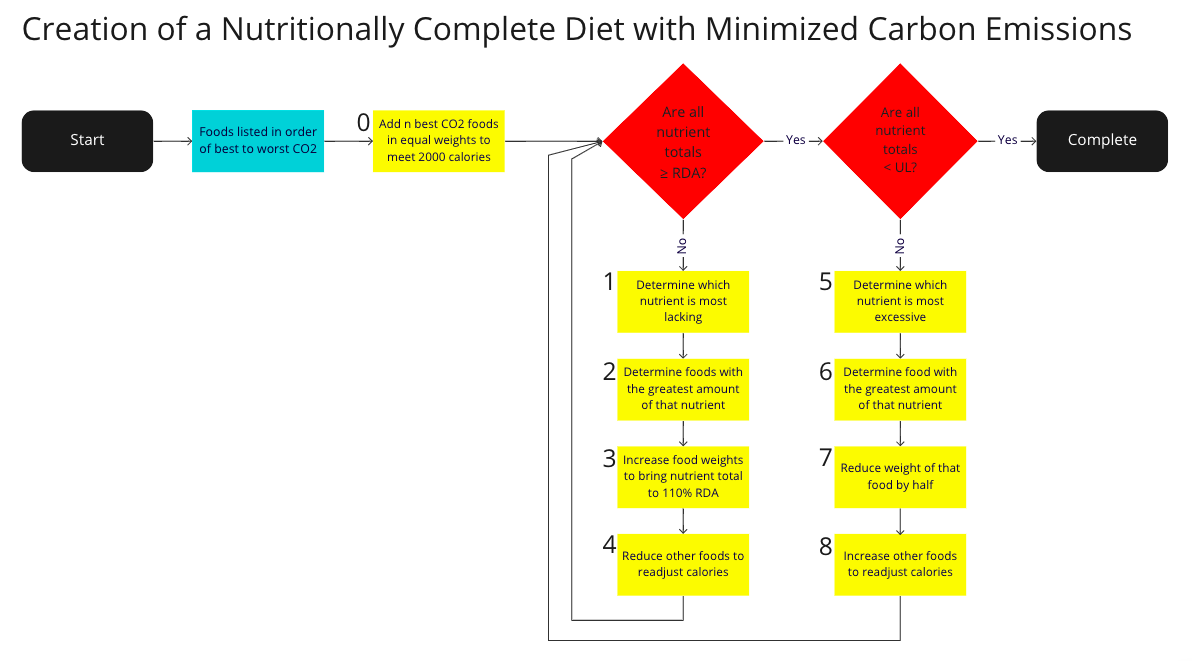

In [8]:
# code cell 8
# IMAGE

from IPython.display import Image
Image('algorithm-flowchart.png')

In [9]:
# code cell 9
# NUTRIENT SERIES CREATION

import numpy as np # We will need numpy since the next steps are calculation-heavy

nutr_req_df = pd.read_csv('nutrient-requirements.csv')

# We create two series to more easily index nutrient requirements by name

# Start of RDA nutrient series definition
nutrient_req_series = pd.Series(data=pd.to_numeric(nutr_req_df['requirement']).values, index=nutr_req_df['name'])

# All units in the nutrient requirements match those in the food composition table

# We deleted nutrients from the food composition table, so we drop rows in our nutrient series that we do not need
# We need to accumulate unneeded nutrients rather than iterating to avoid modification of the series during iteration
unneeded_nutrients = []
nutrient_indices = nutrient_req_series.index.tolist()
for i in range(len(nutrient_req_series)):
    if nutrient_indices[i] not in df.columns:
        unneeded_nutrients.append(nutrient_indices[i])
nutrient_req_series.drop(unneeded_nutrients, inplace=True)

# Now the nutrient series rows match the columns in the food composition table
# End of RDA nutrient series definition

# Start of upper bound nutrient series definition

nutrient_ub_series = pd.Series(data=nutr_req_df['upper_limit'].values, index=nutr_req_df['name'])
# Unlike the RDA series, the UB series has several ND values, indicating no defined upper limit.
# We'll replace the ND values with infinity, though the real values will stay within realistic limits due to calories.
nutrient_ub_series.loc[nutrient_ub_series.values == 'ND'] = np.inf
# We should also drop the same rows that were not needed in the RDA series.
nutrient_ub_series.drop(unneeded_nutrients, inplace=True)
# We should convert our strings to numeric values:
nutrient_ub_series = pd.to_numeric(nutrient_ub_series)

# End of upper bound nutrient series definition

df.loc['Totals'] = 0 # add a totals row at the bottom of the food composition table

In [10]:
# code cell 10
# ALGORITHM

ADD_MULTIPLIER = 1.1 # multiplier for adding food weights, must be between 1.0 RDA and UB
CALORIE_REQ = float(nutrient_req_series['Calories']) # get total calorie requirement

# a helper function to calculate the weight of food required to rebalance calories
def calculate_weight_readjustment(n_subset: pd.DataFrame, weights):
    """Returns the readjustment to multiply to all elements of the Weights column"""
    # pre-readjustment, w1*c1+...+wn*cn = cal_req + cal_diff
    # post-readjustment, rw1*c1+...+rwn*cn = cal_req
    # r = cal_req / (w1*c1+...+wn*cn)
    return CALORIE_REQ / weights.dot(n_subset.iloc[:-1, 0] / 100) # .iloc selects Calories, except last row


# a helper function to calculate the weight of a food required to adjust a nutrient
def calculate_weight_add(n_subset: pd.DataFrame, adjusted_nutrient: str, adjusted_foods: list):
    """Returns the weight of the foods required for adding to a nutrient amount"""
    # nutrient amount needed: adjustment * rda - current total
    nutrient_amount_needed = ADD_MULTIPLIER * nutrient_req_series[adjusted_nutrient]\
                             - n_subset.loc['Totals', adjusted_nutrient]
    # nutrient amount per gram of food: .loc adjusted nutrient and foods / 100
    nutrient_amounts_per_gram_of_food = n_subset.loc[adjusted_foods, adjusted_nutrient].sum() / 100
    # nutrient_amount = weight*nutrient_1+weight*nutrient_2+...+weight*nutrient_n
    # weight = nutrient amount / (nutrient_1+nutrient_2+...+nutrient_n)
    # zero division is a risk here, but does not happen since n has been initialized high enough
    return nutrient_amount_needed / nutrient_amounts_per_gram_of_food


# a helper function called upon success
def printed_rep(n_subset: pd.DataFrame, weights: pd.Series):
    """Return a printed representation of a viable diet."""
    # This returns a list of formatted strings
    returned = []
    for i in range(len(weights)):
        food_names = n_subset.index.tolist()[:-1]
        returned.append(f'{food_names[i]}: {weights[i]} g/day')
    return returned


def algorithm(n: int, df: pd.DataFrame):
    """Returns a nutritionally complete diet of n lowest-carbon foods, or finds if no such diet exists for n foods"""
    # First we create a subset dataframe, containing the first n rows of df and the nutrient totals
    n_subset = df.iloc[np.r_[0:n, -1]].copy() # .copy() is used to avoid the SettingWithCopy warning
    
    # To declare 'a diet with n foods does not work' we need a failure condition
    # If we've iterated m times without all nutrients ≥ RDA, the algorithm will not have worked for n foods
    # Choosing an iteration limit is subjective, but necessary to keep the time to failure reasonable
    # As such, our limit will be a linear function with a high allowance for the complexity of the algorithm
    m = 0
    ITERATION_LIMIT = 20 * n
    
    # The following code is based on the above flowchart logic
    
    # We find the starting weight of each food to add to the diet, so that there will be CALORIE_REQ calories in total
    
    # cn is the calories per gram of food n
    # w is the starting weight of each food added to the diet
    # CALORIE_REQ = w*c1 + w*c2 + ... + w*cn
    # CALORIE_REQ = w(c1 + c2 + ... + cn)
    # w = CALORIE_REQ / (c1 + c2 + ... + cn)
    
    starting_weight = CALORIE_REQ / (n_subset.iloc[:-1, 0].sum() / 100) # .iloc selects 'Calories', except last row
    # We create a series which will contain the weight of each food in grams
    weights = pd.Series(data=starting_weight, index=n_subset.index[:-1])
    
    insufficient = True # the diet starts out as insufficient
    
    while insufficient and m < ITERATION_LIMIT:
        # Calculate nutrient totals
        n_subset.loc['Totals'] = 0 # reset totals to 0 for recalculation
        for i in range(n_subset.shape[0] - 1): # iterate over all the rows of n_subset containing foods
            nutrient_quantities = n_subset.iloc[i] * (weights[i] / 100) # get nutrient totals of a row
            n_subset.loc['Totals'] = n_subset.loc['Totals'] + nutrient_quantities # add that row to 'Totals'
        if (n_subset.loc['Totals'].round(3) >= nutrient_req_series).all(): # the first decision in the flowchart
            if (n_subset.loc['Totals'].round(3) <= nutrient_ub_series).all(): # the second decision in the flowchart
                insufficient = False
            else:
                # Determining which nutrient is most excessive (yellow box 5 in flowchart)
                percentages_of_ub = n_subset.loc['Totals'] / nutrient_ub_series
                
                nutrient_needed = percentages_of_ub.idxmax()
                print('Adjusting', nutrient_needed, 'DOWN')
                
                # Determine food with the greatest amount of that nutrient (yellow box 6 in flowchart)
                
                nutrient_column = n_subset.loc[n_subset.index != 'Totals', nutrient_needed]
                # multiply nutrient column by weight to create another series
                nutrient_amounts = nutrient_column * weights / 100
                # find the food with the greatest amount of nutrient needed
                food_needed = nutrient_amounts.idxmax()
                
                # Reduce weight of that food by half (yellow box 7 in flowchart)
                
                weights.at[food_needed] = weights.at[food_needed] * 0.5
                
                # Increase other foods to readjust calories (yellow box 8 in flowchart)
                
                readj = calculate_weight_readjustment(n_subset, weights)
                
                weights = weights * readj
        else:
            # Determine which nutrient is most lacking (yellow box 1 in flowchart)
            
            percentages_of_rda = n_subset.loc['Totals'] / nutrient_req_series
            
            nutrient_needed = percentages_of_rda.idxmin()
            print('Adjusting', nutrient_needed, 'UP')
            
            # Determine foods with the greatest amount of that nutrient (yellow box 2 in flowchart)
            
            nutrient_column = n_subset.loc[n_subset.index != 'Totals', nutrient_needed]
            calorie_column = n_subset.loc[n_subset.index != 'Totals', 'Calories']
            nutrient_per_calories = nutrient_column / calorie_column
            # This calculates the food with the greatest effect on the nutrient and lowest effect on calories
            nutrient_per_calories.sort_values(ascending=False, inplace=True)
            food_index = 10
            foods_needed = nutrient_per_calories.index.tolist()[0:food_index]
            
            # Increase food weight to bring those foods to 110% RDA (yellow box 3 in flowchart)
            
            weight_of_food_required = calculate_weight_add(n_subset, nutrient_needed, foods_needed)
            
            weights.loc[foods_needed] = weights.loc[foods_needed] + weight_of_food_required
            
            # Reduce other foods to readjust calories (yellow box 4 in flowchart)
            
            readj = calculate_weight_readjustment(n_subset, weights)
            
            weights = weights * readj
        m += 1
    if insufficient:
        return (f'Unable to generate diet with {n} foods')
    else:
        check_df = pd.DataFrame(index=nutrient_req_series.index,columns=['RDA', 'CURRENT', 'UL'])
        check_df['RDA'] = nutrient_req_series
        check_df['CURRENT'] = n_subset.loc['Totals'].round(2)
        check_df['UL'] = nutrient_ub_series
        return (printed_rep(n_subset, weights), check_df)
    
for n in [50]:
    result = algorithm(n, df)
result[1] # all the nutrients in the dataframe displayed are between the RDA and UL.

Adjusting Vitamin A UP
Adjusting Calcium UP
Adjusting Potassium UP
Adjusting Manganese DOWN


,RDA,CURRENT,UL
name,,,
Calories,2000.0,2000.00,2000.0
Carbohydrate,130.0,237.53,inf
Protein,56.0,74.25,inf
Fat,75.0,98.10,inf
Calcium,1200.0,1333.54,2000.0
Copper,0.9,3.70,10.0
Iron,18.0,24.16,45.0
Magnesium,420.0,894.12,inf
Manganese,2.3,10.99,11.0


In [11]:
# code cell 11
# NUTRITIONALLY COMPLETE DIET WITH MINIMIZED CARBON EMISSIONS

result[0]

['Potatoes, raw, skin: 17.174070161966103 g/day',
 'Onions, raw: 17.174070161966103 g/day',
 'Nuts, almond butter, plain, without salt added: 17.174070161966103 g/day',
 'Apple juice, canned or bottled, unsweetened, without added ascorbic acid: 17.174070161966103 g/day',
 'Limes, raw: 17.174070161966103 g/day',
 'Oranges, raw, all commercial varieties: 17.174070161966103 g/day',
 'Lemons, raw, without peel: 17.174070161966103 g/day',
 "Orange juice, raw (Includes foods for USDA's Food Distribution Program): 17.174070161966103 g/day",
 'Apples, raw, without skin: 17.174070161966103 g/day',
 'Oil, coconut: 17.174070161966103 g/day',
 'Nuts, almonds: 17.174070161966103 g/day',
 'Beverages, almond milk, unsweetened, shelf stable: 42.965484365092784 g/day',
 'Squash, summer, zucchini, includes skin, raw: 54.780994902908844 g/day',
 'Cucumber, peeled, raw: 80.57240910603552 g/day',
 'Bananas, raw: 17.174070161966103 g/day',
 'Cabbage, raw: 42.965484365092784 g/day',
 'Cauliflower, raw: 54.78

## 3 Conclusion

The algorithm was able to output a viable diet with 50 foods. All the nutrients from these foods fell between the recommended dietary allowance (RDA) and the tolerable upper intake level (UL). Though the printed form of the diet seems to contain a lot of very small food quantities, keep in mind that the diet can be multiplied to contain the food consumed in a given week or month. Rather than having a micro-buffet of 50 foods in a day, you would eat larger quantities of these foods sporadically.

### 3.1 Insights

Our primary research question was, "Can data be used to derive a nutritionally complete diet with extremely low climate impact?" Overall, the answer is yes, and we have accomplished our main goal of simply proving it can be done. Beyond this, observing just the output of our algorithm, we can derive some key insights.

1. Only four loops through the algorithm were needed for a diet to be generated. What this means is that every other nutrient 'fell into place'. This likely indicates that most nutrients don't need to be worried about. A good thing too, considering how many of them there are.
2. The algorithm prioritized low-calorie, high-vitamin-and-mineral foods, and arrived at a diet containing higher quantities of them very quickly. As such, if this priority were shaped towards high-calorie, high-vitamin-and-mineral foods (or a similar choice of food qualities) it would likely also result in a viable diet. Put simply, many possible diets with these foods exist.
3. Our linear iteration limit of 20 * n, or 1000 iterations for 50 foods, was more than sufficient for a diet with these restrictions. Modification of the algorithm and the nutrient requirements CSV to be more stringent might increase the number of iterations required, but the algorithm's iteration limit should remain sufficient for most modifications.

### 3.2 Limitations

Several of the nutrients used in this analysis are more complex than they seem. Vitamin K, for example, is actually divisible into three sub-forms, Vitamins K1, K2, and K3. Because the nutrient data is most reliable for agglomerations of nutrients, this is the data that was used. While some increasingly obscure nutrients are essential, because of sparse data it is often best to use insight 1 and avoid worrying about every single possible nutrient.

The food composition datasets were direct downloads of database information from the USDA. The database used, SR Legacy, was last updated about three years ago and will not be further updated. Newer databases exist which are using more analytical and transparent techniques to produce highly accurate results, but these new databases simply have much less data. As such, the SR Legacy was the best source of food composition data. Right now, it's the best there is, so it had to be used despite the lack of further support.

Additionally, the climate data downloaded did not contain some basic foods, such as rice. This data is comparatively very new, so it is likely going to be evolving, and more comprehensive data can be acquired for future analyses that are similar to this one.

### 3.3 Findings and Possibilities

The analysis fundamentally makes clear that it is possible for the carbon emissions of an average person's diet to be minimized. The implications are wide-reaching, considering food causes more than a quarter of global greenhouse gas emissions [2]. Plant foods, especially fruits and vegetables, are likely to be taking up more and more of the average person's diet as health and environmental science advances.

This intersection of nutrition and climate data is new. It has already been mentioned that future analyses could be conducted with more data and better data, but what about other possibilities? Most people who might benefit from the conclusions derived in this analysis are non-programmers. They can read the findings, but not interact with the code in the analysis itself. Though the central core of the algorithm, as well as the display options, would require improvement, having an interactive nutrition/climate tool based around the techniques explored here would be a fantastic project for the future. 


## References

1. "Dietary reference intakes tables." *canada.ca*, 29 Sep. 2022, https://www.canada.ca/en/health-canada/services/food-nutrition/healthy-eating/dietary-reference-intakes/tables.html.

2. Ritchie, Hannah, and Max Roser. “Environmental Impacts of Food Production.” *Our World in Data*, 2 Dec. 2022, https://ourworldindata.org/environmental-impacts-of-food.

3. Poore, J., and T. Nemecek. "Reducing food’s environmental impacts through producers and consumers." *Science*, 1 Jun. 2018, https://www.science.org/doi/10.1126/science.aaq0216.

4. Clark, Michael et al. "Estimating the environmental impacts of 57,000 food products." *PNAS*, 8 Aug. 2022, https://doi.org/10.1073/pnas.2120584119.

5. “Creative Commons Legal Code.” *Creative Commons - Attribution 4.0 International* - CC BY 4.0, https://creativecommons.org/licenses/by/4.0/legalcode.

6. "Terms and conditions." *canada.ca*, 28 Jul. 2022, https://www.canada.ca/en/transparency/terms.html.

7. U.S. Department of Agriculture, Agricultural Research Service. FoodData Central, 2019. https://fdc.nal.usda.gov/.

8. "API Guide." *FoodData Central*, https://fdc.nal.usda.gov/api-guide.html.

9. "Canadian Nutrient File (CNF) 2015." *canada.ca*, 3 Jun. 2016, https://www.canada.ca/en/health-canada/services/food-nutrition/healthy-eating/nutrient-data/canadian-nutrient-file-2015-download-files.html.

10. "Australian Food Composition Database." *foodstandards.gov.au*, Jan. 2022, https://www.foodstandards.gov.au/science/monitoringnutrients/afcd/pages/default.aspx.

11. "Chromium." *National Institute of Health, Office of Dietary Supplements*, 22 Mar. 2021, https://ods.od.nih.gov/factsheets/Chromium-Consumer/.

12. "Fluoride." *National Institute of Health, Office of Dietary Supplements*, 22 Mar. 2021,
https://ods.od.nih.gov/factsheets/Fluoride-Consumer/.

13. "Iodine." *National Institute of Health, Office of Dietary Supplements*, 28 Jul. 2022,
https://ods.od.nih.gov/factsheets/Iodine-Consumer/.

14. "Molybdenum." *National Institute of Health, Office of Dietary Supplements*, 22 Mar. 2021, https://ods.od.nih.gov/factsheets/Molybdenum-Consumer/.

15. "Chloride." *Harvard T.H. Chan School of Public Health*, https://www.hsph.harvard.edu/nutritionsource/chloride/.

16. "Biotin." *National Institute of Health, Office of Dietary Supplements*, 10 Jan. 2021, https://ods.od.nih.gov/factsheets/Biotin-HealthProfessional/.

17. "Vitamin B12." *National Institute of Health, Office of Dietary Supplements*, 22 Dec. 2022, https://ods.od.nih.gov/factsheets/VitaminB12-HealthProfessional/.

18. "Vitamin D." *National Institute of Health, Office of Dietary Supplements*, 12 Aug. 2022,
https://ods.od.nih.gov/factsheets/VitaminD-HealthProfessional/.